1. **[Load Data](#load_data)**
2. **[Initial View of Data](#view_data)**
3. **[Slicing Dataset](#slice_data)**
4. **[Modifying Dataset](#mod_data)**

In [ ]:
import os
os.chdir('/Users/Tawsif/Documents/Python')
print(os.listdir())

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<a id='load_data'></a> 
### 1. Loading Data

In [26]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id='view_data'></a> 
### 2. Initial View of Data

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [174]:
df.info()
print(df.shape)
df.apply(lambda x: sum(x.isnull()),axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
(891, 13)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

### Slicing the dataset
#### Column Slicing

The following returns a series -

In [168]:
df['Age'].head(5) 

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

But this will return a data frame - 

In [169]:
df[['Age']].head(5) 

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [171]:
df[['Age','Pclass','Fare']].head(5)

,Age,Pclass,Fare
0,22.0,3,7.2500
1,38.0,1,71.2833
2,26.0,3,7.9250
3,35.0,1,53.1000
4,35.0,3,8.0500


In [ ]:
df[]

### Modifying the dataset
#### Replace missing values and change data types

In [42]:
df = df.replace({'Not Available': np.nan})
cols_to_float = ['Age']
for col in list(df.columns):
    if col in cols_to_float:
        df[col] = df[col].astype(float)
        
df['Sex'] = df['Sex'].apply(str.title)

#### Create new variables

In [71]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df['FamilySize'].nunique()

9

### Creating summaries
1. Total Counts
2. Survival Rate
3. Average

If you are calculating multiple aggregate metrics it is better to put them in all one function. You can later group by other columns. 

In [155]:
def my_agg(x,group):
    n = x.shape[0]
    names = {
        'Group' : x[group].max(),
        'Count' : x['PassengerId'].count(),
        'SurvivalCount': x['Survived'].sum(),
        'SurvivalRate':  100*x['Survived'].sum()/n,
        'AverageAge': x['Age'].mean()
    }
    
    return pd.Series(names, index=['Group','Count','SurvivalCount', 'SurvivalRate', 'AverageAge'])
        
s = df.groupby("Sex").apply(my_agg, group = ("Sex"))
s

,Group,Count,SurvivalCount,SurvivalRate,AverageAge
Sex,,,,,
Female,Female,314,233,74.203822,27.915709
Male,Male,577,109,18.890815,30.726645


### Bar Plots

Seaborn barplot uses estimator function which has a default value 'mean'. Other functions that can be used are 'median', 'sum' or anything that returns a scalar. 

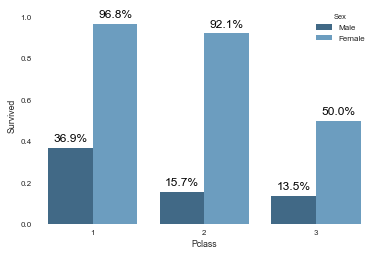

In [161]:
sns.set_style("white")  
sns.set_context('paper')

ax = sns.barplot(x="Pclass", y="Survived",hue = "Sex",palette= 'Blues_d',
                errwidth=0,data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height() + .02, '%.1f' % (p.get_height()*100) + '%' , 
            fontsize=12, color='black', ha='center', va='bottom')

sns.despine(left = True, bottom = True) 
plt.show()